# Whoop! Whoop!

Phil 4:13 You did it!

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import tree
# import graphviz
from sklearn import metrics 

%matplotlib inline

In [50]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [51]:
raw = pd.read_csv('../train.csv')
working_df = raw
# raw.tail(10)
raw.shape

(1460, 81)

# Feature Engineeering

 ### Dealing with N/a 's
 List all of the columns that have N/a as an option

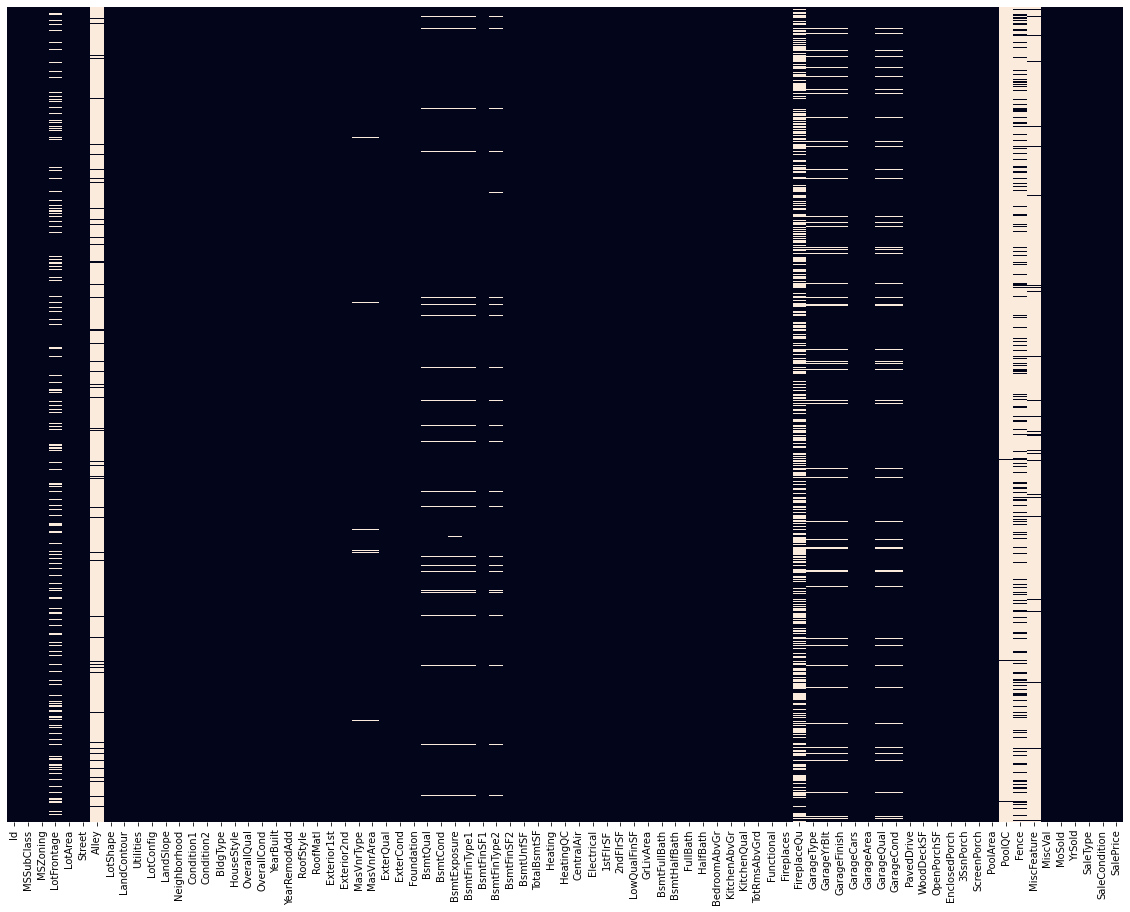

In [52]:
raw.isnull()
heatmap, ax2 = plt.subplots(figsize = (20,15))
# ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap='YlGnBu
ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False)

## N/A COLUMN NAMES
* LotFrontage: Linear feet of street connected to property
* Alley 
    *  = No alley access
* MasVnrType: Masonry veneer type
    * 
* MasVnrArea
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Electrical
* FireplaceQu
* GarageType
* GarageYrBlt
* GarageFinish
* GarageQual
* GarageCond
* PoolQC
* Fence
* MiscFeature

In [37]:
# Note:
# In each column the N/a means something different. To get the correct data meaning 
# we need to properly replace the N/a values with their corresponding meaning
# researching the column category (ie. Lot frontage) may be neccessary to find that desired cooresponding value

In [38]:
def fixNa(df, stage):
    # correct mislabled NAs
    naMeanings = {
        "LotFrontage":0 ,"Alley": "notIncluded","MasVnrType": "notIncluded",
        "BsmtQual": "notIncluded","BsmtCond":"notIncluded",
        "BsmtExposure": "notIncluded","BsmtFinType1": "notIncluded",
        "BsmtFinType2": "notIncluded","FireplaceQu":"notIncluded",
        "GarageType": "notIncluded","GarageYrBlt": "notIncluded",
        "GarageFinish": "notIncluded","GarageQual": "notIncluded",
        "GarageCond": "notIncluded","PoolQC": "notIncluded",
        "Fence": "notIncluded","MiscFeature": "notIncluded"
    }
    
    for col in naMeanings:
        df[col].fillna(naMeanings[col], inplace=True)
    
    # remove actual NAs
    if stage == "training":
        df.dropna(axis=0, inplace = True)
        
    
    return df

In [39]:
corr_val = -.5

# return df with the top features to train model
def feature_selecting_prep(df, target_value):
    #df of target correlation values
    # target_corr = df.corr()[[target_value]].sort_values(by=target_value, ascending=False)
    target_corr = df.corr()[[target_value]]
    # find features w/ corr value greater than/= to .5 w/ the target 
    top_feat = target_corr.loc[target_corr[target_value] >=corr_val] 
    
    # find these important columns/features using the entire working data set
    ready_df = df[top_feat.index.tolist()]
    
    return ready_df
# feature_selecting_prep(working_df, 'SalePrice')

In [53]:
def feature_selecting(df,columns_list):
    for feature in df.columns:
        if feature not in columns_list:
            df.drop(feature, inplace=True, axis=1)
            # print(df.columns)
    return df

In [54]:
working_df = raw
def preprocessing(df, status):
    df = fixNa(df,status)
    
    if status == "training":
        #choose the best numberical features
        target_value = "SalePrice"
        
        df = feature_selecting_prep(df, target_value)
        
        top_features_df = feature_selecting_prep(working_df, target_value)
        
        good_columns = []
        for c in top_features_df.columns:
            good_columns.append(c)
            
        num_features = feature_selecting(working_df, good_columns)
        df = num_features
    
    return df

In [41]:
# # show me the features that are correlated with Target
target_value = "SalePrice"
top_features_df = feature_selecting_prep(working_df, target_value)

good_columns = []
for c in top_features_df.columns:
    good_columns.append(c)

In [55]:
# working_df = preprocessing(working_df,"training")
working_df = preprocessing(working_df,"testing")

# pd.unique(working_df["Alley"])

In [57]:
working_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,notIncluded,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,notIncluded,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,notIncluded,notIncluded,notIncluded,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,notIncluded,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,notIncluded,notIncluded,notIncluded,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,notIncluded,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,notIncluded,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,notIncluded,notIncluded,notIncluded,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,notIncluded,notIncluded,notIncluded,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,notIncluded,MnPrv,notIncluded,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,

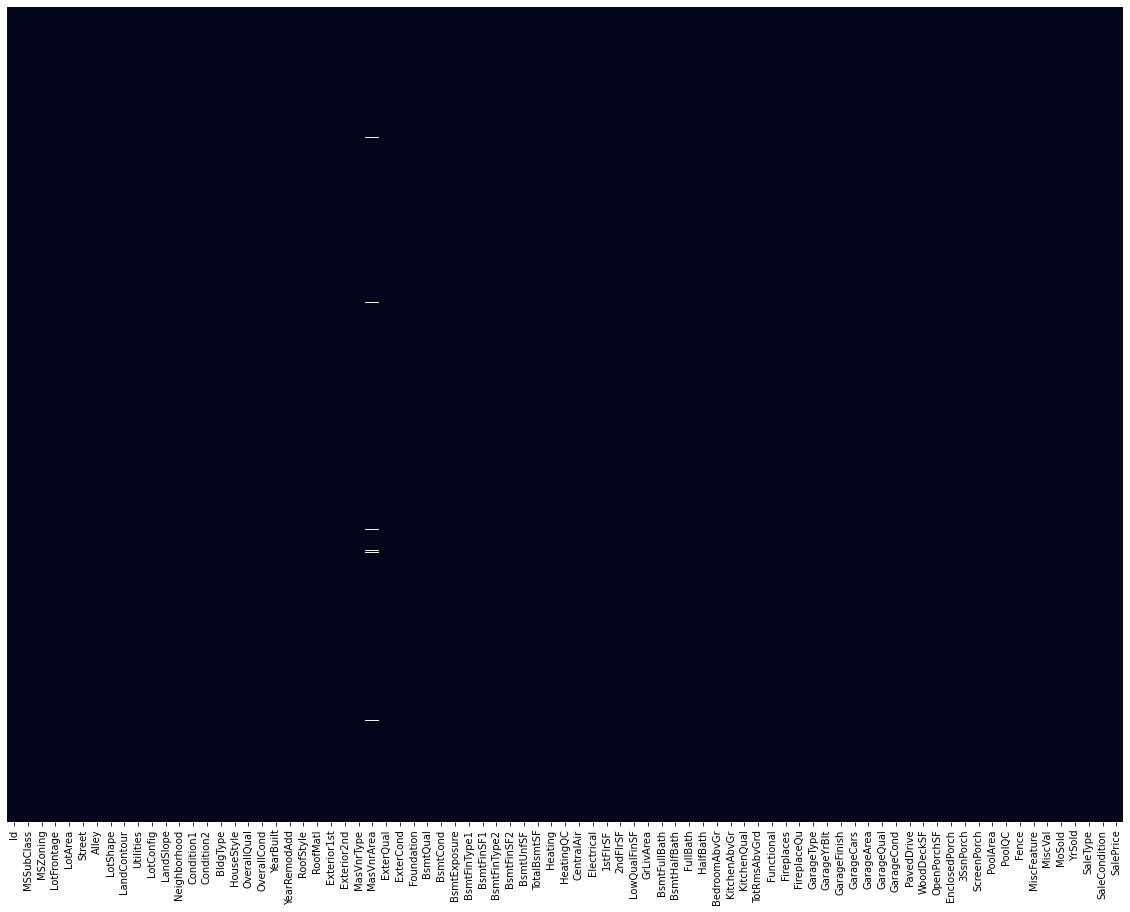

In [59]:
heatmap, ax2 = plt.subplots(figsize = (20,15))
# ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap='YlGnBu
ax2=sns.heatmap(working_df.isnull(),yticklabels=False,cbar=False)

In [60]:
# now lets feature engeneer!
"""
Recap:
- all NAs have been removed but when i replaced empty lot frontage values with 0 we now kinda have a lot of outliers
-- instead of using 0 I'll ues the mean of that feature
What's next:
- graph a corrilation plot to get rid of the corrilated features
- Handle categorical features (there's a bunch but you got it)
--- ones with only 2 options use 1-hot encoding
--- ones with 3+ options use target encoding ...provided it doesnt need the target column 
- Normalize the data

- Split the data
- train the model
- test it!! and repeat
"""

"\nRecap:\n- all NAs have been removed but when i replaced empty lot frontage values with 0 we now kinda have a lot of outliers\n-- instead of using 0 I'll ues the mean of that feature\nWhat's next:\n- graph a corrilation plot to get rid of the corrilated features\n- Handle categorical features (there's a bunch but you got it)\n--- ones with only 2 options use 1-hot encoding\n--- ones with 3+ options use target encoding ...provided it doesnt need the target column \n- Normalize the data\n\n- Split the data\n- train the model\n- test it!! and repeat\n"

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

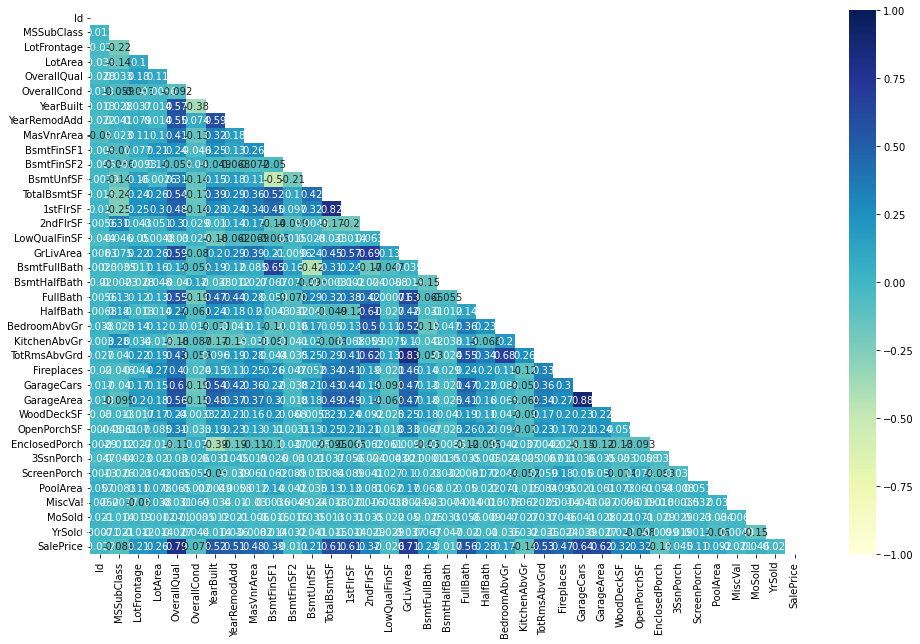

In [61]:
plt.figure(figsize=(16, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(working_df.corr(), dtype=np.bool))
sns.heatmap(working_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')


In [62]:
# # visualize what features the model is using based off of feature_selecting function
# def checkCorrStat(df,target_value, corr_val):
#     target_corr = df.corr()[[target_value]].sort_values(by=target_value, ascending=False)
#     top_feat = target_corr.loc[target_corr[target_value] >=corr_val] 
    
#     plt.figure(figsize=(8, 12))
#     heatmap = sns.heatmap(top_feat, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#     heatmap.set_title('Features Correlating with '+ target_value, fontdict={'fontsize':18}, pad=16);

# checkCorrStat(working_df, "SalePrice", corr_val)
# # checkCorrStat(working_df, "OverallQual", -.5)


In [63]:
y = working_df['SalePrice']
#don't forget this step
X = working_df.drop(['SalePrice', 'Id'], axis =1)

In [64]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,notIncluded,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,notIncluded,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,notIncluded,notIncluded,notIncluded,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,notIncluded,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,notIncluded,notIncluded,notIncluded,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,notIncluded,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,notIncluded,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,notIncluded,notIncluded,notIncluded,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,notIncluded,notIncluded,notIncluded,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,notIncluded,MnPrv,notIncluded,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,notIncluded,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,notIncluded,Reg,Lvl,AllP

In [65]:
y.shape
X.shape


(1460, 79)

# Training

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'

In [67]:
train_score = regressor.score(X_train, y_train) 
test_score = regressor.score(X_test, y_test)

ValueError: could not convert string to float: 'RL'

# Prediction

In [673]:
# the real test data
test_data_raw = pd.read_csv('../test.csv')

test_data = preprocessing(test_data_raw)
test_data = feature_selecting(test_data,good_columns)
test_data_id = test_data['Id']
test_data_id
pred_score = regressor.predict(test_data.drop('Id', axis=1))


In [674]:
q = test_data['Id'].tolist
w = pd.DataFrame(data =test_data['Id'], columns=["Id"])
p=pd.DataFrame(pred_score,columns=["SalePrice"])

print(w.shape)
print(p.shape)

# w = w.append(p, ignore_index = False) # how to add rows...not columns
# w = w.join([p])
w["SalePrice"]=p['SalePrice'].values

(1432, 1)
(1432, 1)


In [675]:
final_submission = w
final_submission

,Id,SalePrice
0,1461,119465.292172
1,1462,162438.507496
2,1463,171079.901630
3,1464,200046.759808
4,1465,196036.331227
...,...,...
1454,2915,54008.881291
1455,2916,63929.075373
1456,2917,175459.671693
1457,2918,102463.546676


In [676]:
final_submission.to_csv("submission.csv",index=False)

ImportError: cannot import name 'CompressionOptions' from 'pandas._typing' (/opt/anaconda3/lib/python3.7/site-packages/pandas/_typing.py)

# Test Time!

In [528]:
# record your progress with the model
from datetime import datetime

file1 = open("scoring.txt","a")#append mode
message = str(datetime.now().date()) + "\n Training Score " + str(train_score) + "\n Test Score " + str(test_score) +  "\n Corrilation Value " + str(corr_val) + "\n \n"
file1.write(message)
file1.close()


# regressor.coef_
# regressor.intercept_

In [311]:
str(datetime.now().date())

'2022-01-16'

In [312]:
# sns.distplot(working_df['SalePrice'], kde = False, color ='red', bins = 30)

In [ ]:
# just found out!!!
# heatmap only works for numerical data so ...i've been trainng and testing without my categorical features ..oops

# Now:
# 1. enter submission just to see where we are
# 2. one-hot-encode categories and combine with high numerical ones
# 3. check score at this time
# 4. remove outliers
# 5. normalize the data
# 6. Rest like Jesus on the 7th day because.... you're finished!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
